# Reducing the number of major vehicle accidents

## Context
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering the following questions:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day / day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

# Executive summary

## Main findings

- Over 90 000 vehicle accidents were reported in 2020, with 202 (0.22%) of these classified as major.
- On average, an accident occurred every 5.8 minutes and a major accident occurred every 44 hours.
- Most non-major accidents happen on weekdays between 15:00 and 18:00. The number of accidents per day increases steadily throughout the week and peaks on a Friday.
- Major accidents are more likely to take place over the weekend, with almost a quarter occurring on Saturdays. These accidents have the highest probability to occur on Saturday nights between 20:00 and 23:00.
- Over two thirds (68%) of non-major accidents occur in urban areas. In contrast, 76% of major accidents occur in rural areas.
- Major accidents are much more likely to occur on high-speed roads than roads with lower speed limits.

## Recommendations
- Increase traffic policing efforts on Saturday nights, especially in rural areas. These can take the form of roadblocks to check for driver intoxication and measures to ensure adherence to the speed limits.
- Major accidents tend to occur on rural roads with high speed limits. Brainstorming efforts should be focused interventions on these roads. For example, adding lights and reflective road markers to increase visibility at night.
- Accidents that occur at high speeds will always be more serious, but simply reducing the speed limit is not necessarily the solution. A much larger factor is when vehicles travel at different speeds on the same road. High-speed rural roads that are often used by slow-moving heavy vehicles should be reviewed, and roads should be expanded to dual carriageways where necessary.
- There does not seem to be a physical feature at the site of an accident that greatly increases the chance of an accident being considered major. The conditions that lead to major accidents are more likely linked to human behaviour, and interventions targeted at road users rather than roads will be more effective.


## Limitations and future studies

- Clarity should be given on some of the data. For example, there are no accidents where no one was injured. There are also 319 accidents with five or more casualties, but the accident is classified as "Slight". I suspect that the number of casualties might actually be the number of people present in the vehicles involved in the accident, and not the number of people injured, but this has to be confirmed.
- Data for a longer period will be beneficial to find trends of accidents over time. The year 2020 is not representative of a typical year, as the Covid-19 pandemic affected driving patterns and human behaviour in a significant way. 
- There is very little data for the class of interest, so it is hard to extract meaningful statistics regarding major accidents. It is recommended that the definition of major accidents is expanded, or that more data is added to the dataset.
- Supplementary data on general road usage patterns and infrastructure would allow investigators to control for the prevalence of features when trying to determine their role in safety. For example, accidents are 18 times more likely to occur at an auto traffic signal than at a stop sign. However, without more data on the number of traffic signals and stop signs in the UK, this does not provide any useful information.
- Accidents are more often due to human behaviour than infrastructure. Given the high number of major accidents late on Saturday nights, driver intoxication is probably a factor. However, other characteristics such as unroadworthy vehicles and fatigued long-haul truck drivers might also be contributing factors. Supplementary information on the drivers and vehicles involved in accidents (e.g., suspected intoxication, age, years with driver’s license, type of vehicle) will go a long way to propose targeted interventions to reduce the number of major accidents.


# Data cleaning

## General inspection

The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [77]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,01:50,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,02:25,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1


In [78]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


The original dataframe consists of  entries and 27 columns. There are no duplicate entries and all observations are for 2020, as expected. The `accident_year` and `accident_reference`
columns were dropped, as they did not provide any new information. 

There are no accidents in the dataset with zero casualties. This might be an inherent attribute of the data, where only accidents where somebody was injured is recorded. Alternatively, it might be that the data capturing process allowed for a minimum of 1 for the number of casualties, and minor accidents where no one was injured still reflect as having one casualty.

In [79]:
# check that all values of accident_index are unique
assert accidents['accident_index'].nunique() == accidents.shape[0]

# check that all values of of accident_year is 2020
assert (accidents['accident_year'] == 2020).all()

# drop accident_year column 
accidents.drop('accident_year', axis = 'columns', inplace = True)

# drop accident_reference as it contains the same information as accident_index
accidents.drop('accident_reference', axis = 'columns', inplace = True)

# check that longitude values are all in the UK
assert accidents['longitude'].min() > -8
assert accidents['longitude'].max() < 2

# check that latitude values are all in the UK
assert accidents['latitude'].min() > 49 
assert accidents['latitude'].max() < 61

# check that all values of accident_severity is either 1, 2 or 3
assert accidents['accident_severity'].isin([1,2,3]).all()

# convert date to datetime object
accidents['date'] =  accidents['date'] + ' ' + accidents['time']
accidents['date'] = pd.to_datetime(accidents['date'], format='%d/%m/%Y %H:%M')

## Dealing with missingness

The `latitude` and `longitude` columns are the only ones to have NaN values (14 each). Missing values are indicated with -1 in the dataframe. Most observations have no missing data, but some have up to 8 missing features. The observations with 2 or more missing features, as well as the observations with missing coordinates, were dropped. These accounted for 0.4% of the dataset and none of the dropped observations were part of the class of interest, i.e. major accidents.

In [80]:
# count number of missing features per observation
missing_per_row = (accidents == -1).sum(axis=1) 

# drop rows with more than one missing value
accidents = accidents[missing_per_row < 2]

# drop rows where there are NaN values
accidents = accidents[~((accidents['latitude'].isna()) | (accidents['longitude'].isna()))]

# ensure that all NaN values have been dealt with
assert ~accidents.isna().sum().any()

The `junction_control` column is missing more than 40% of its values. A value of 0 in this column indicates no nearby junction, but there are no 0 values in this column. A 0 in `junction_detail` also indicates no nearby junction. Therefore, I will impute 0 for missing values of `junction_control` for accidents where `junction_detail` is 0.

In [81]:
# conditions where there is no junction, but it is not reflected in junction_control
no_junction_missing_control = (accidents['junction_control'] == -1) & (accidents['junction_detail'] == 0)

# impute 0 where in junction_control where it is known
accidents.loc[no_junction_missing_control,'junction_control'] = 0

# check if most of the missing -1 entries were elimiated
accidents['junction_control'].value_counts(normalize = True)

 4    0.439804
 0    0.415528
 2    0.114490
 9    0.016911
 3    0.006408
 1    0.004151
-1    0.002708
Name: junction_control, dtype: float64

The missing values in all columns make up only a small portion (less than 0.5%) of the total values. I will therefore impute the modes of the columns for the missing values as they are all categorical.

In [82]:
# list of columns with missing values
cols_impute_mode = ['speed_limit', 'junction_control','junction_detail', 'second_road_number','pedestrian_crossing_human_control','pedestrian_crossing_physical_facilities', 'road_surface_conditions','special_conditions_at_site','carriageway_hazards']

# impute the mode of each column for missing values
for col in cols_impute_mode:
    accidents.loc[accidents[col] == -1, col] = accidents[col].mode()[0]

# ensure all missing values have been dealt with
print('Missing values left:',(accidents == -1).any().sum())

Missing values left: 0


## New columns
For this study, we are specifically interested in major accidents, which are defined as fatal accidents with 3 or more casualties. I will add a column `major`, which will have a value of 1 if the accident meets the criteria for a major accident, and 0 otherwise.  

I will also add a column with the hour in which the accident happened to assist with visualization later in the report.

In [83]:
import numpy as np
major_conditions = (accidents['number_of_casualties'] >= 3) & (accidents['accident_severity'] == 1)
accidents['major'] = np.where(major_conditions, 1, 0)

accidents['time_hr'] = accidents['time'].str[:2]
hour_order = ['0' + str(x) if x < 10 else str(x) for x in range(24)]
accidents['time_hr'] = accidents['time_hr'].astype('category')
accidents['time_hr'] = accidents['time_hr'].cat.set_categories(hour_order, ordered=True)

major_accidents = accidents[accidents['major'] == 1]
non_major_accidents = accidents[accidents['major'] == 0]

# What time of day and day of the week do most major incidents happen?

In this section, I will look at the patterns that accidents follow over time, specifically looking at time of day and day of the week. 

## Accidents over the year

The overwhelming number of accidents are classed as slight (78%), followed by serious (20%) and fatal (1.5%). The major accidents make up 0.22% of the total number of accidents in the data set.   On average, an accident occurred every 5.8 minutes and a major accident occured every 44 hours in 2020.

From Fig. 1 we can see a significant reduction in car accidents during March / April 2020. This coincides with lockdown precautions for the Covid-19 pandemic in the United Kingdom where there were significantly fewer cars on the road than there would have been in a typical year. There was another lockdown during November of 2020. Data for other more typical years are needed to extract any general trends related to vehicle accidents over the course of a year. I suspect there will be correlations with school holidays and seasonal weather. However, human behavior and the number of road users were strongly impacted by the pandemic, so no general trends can be extrapolated.

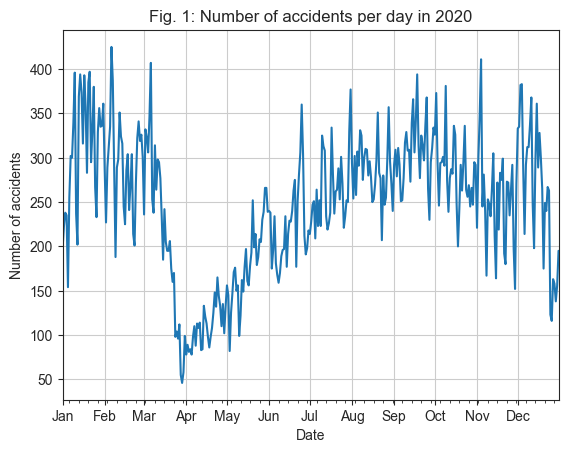

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style("ticks",{'axes.grid' : True})

# extract number of accidents per day
no_accidents_day_of_year = accidents.resample('D', on='date')['accident_index'].count()

# create plot
ax = no_accidents_day_of_year.plot()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xlabel('Date')
plt.ylabel('Number of accidents')
plt.title('Fig. 1: Number of accidents per day in 2020')
plt.show()

## Accidents over the course of a day

Fig. 2 compares the average number of accidents per hour over the course of a day. Most non-major accidents occur during the daylight hours. There is a peak between 08:00 and 09:00 and again between 15:00 and 18:00. This suggests that the number of non-major accidents is correlated to the number of cars on the road, as these times coincide with rush hours when people are commuting to and from work. There are very few non-major accidents between 23:00 and 06:00.

The pattern for major accidents is different than for non-major ones. The likelihood of a major accident occurring is low in the morning and increases from 09:00. There are peaks between 17:00 and 19:00, and again between 22:00 and 23:00. Interestingly, there is a marked reduction in the chance of a major accident between 19:00 and 20:00. For some hours of the day, there is little data, so this distribution might be affected by noise.

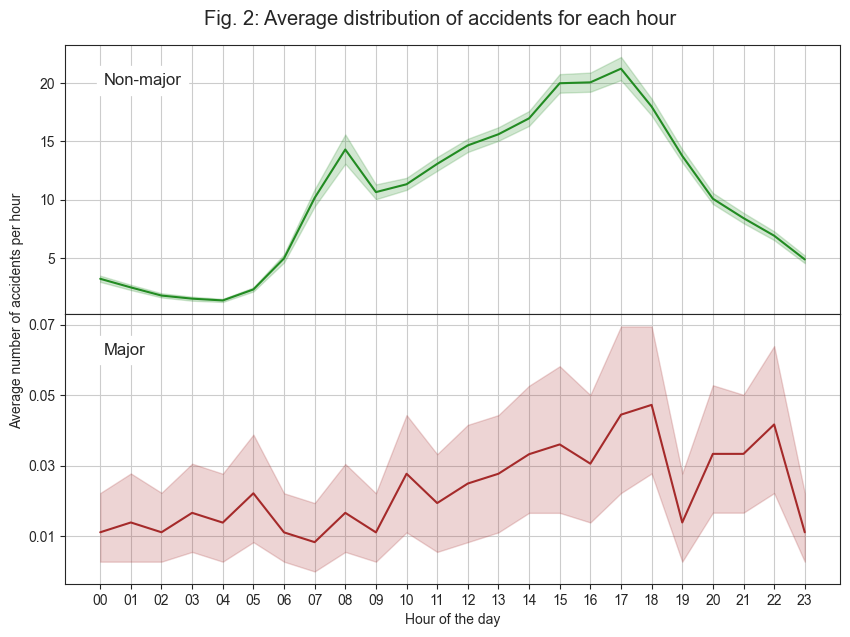

In [85]:
# count non-major accidents in each hour over the year
non_major_accidents_hour_count = non_major_accidents.resample('H', on='date')['accident_index'].count()
non_major_accidents_hour_count = pd.DataFrame(non_major_accidents_hour_count).reset_index()
non_major_accidents_hour_count['hour']=non_major_accidents_hour_count['date'].dt.hour

# count major accidents in each hour over the year
major_accidents_hour_count = major_accidents.resample('H', on='date')['accident_index'].count()
major_accidents_hour_count = pd.DataFrame(major_accidents_hour_count).reset_index()
major_accidents_hour_count['hour'] = major_accidents_hour_count['date'].dt.hour

# create lables for x-axis
hour_label = ['0' + str(x) if x < 10 else str(x) for x in range(24)]

fig, ax = plt.subplots(2,1, sharex = True, figsize=(10, 7))

# plot average number of accidents per hour
sns.lineplot(x='hour', y='accident_index',data=non_major_accidents_hour_count, ax=ax[0], color='forestgreen')
sns.lineplot(x='hour', y='accident_index',data=major_accidents_hour_count, ax=ax[1], color='brown')
plt.setp(ax, xticks=np.arange(24), xticklabels=hour_label)
ax[1].set_yticks([0.01, 0.03, 0.05, 0.07])
ax[0].set_ylabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(hspace=0)
fig.suptitle('Fig. 2: Average distribution of accidents for each hour',fontsize='x-large', y =0.93)
plt.xlabel('Hour of the day')
fig.text(0.07, 0.5, 'Average number of accidents per hour', va='center', rotation='vertical')
ax[0].text(0.05, 0.85, 'Non-major', backgroundcolor='1', transform=ax[0].transAxes, fontsize='large')
ax[1].text(0.05, 0.85, 'Major', backgroundcolor='1', transform=ax[1].transAxes, fontsize='large')
plt.show()

## Accidents per day of the week

Fig. 3 shows the percentage of non-major and major accidents that occurred on each day of the week. The number of non-major accidents increases from Monday during the business week, peaking on Friday. Sunday has the lowest number of accidents, followed by Saturday. 

The data shows that more accidents per day of the week does not correlate to more major accidents. Most (24%) major accidents occur on Saturdays, followed by Sundays and then Thursdays. Major accidents are the least likely to occur on a Monday.

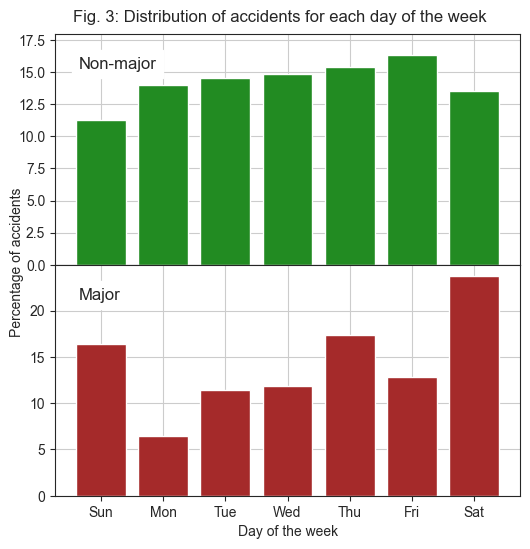

In [86]:
# create df with number of major and non-major accidents per day of the week
no_accidents_weekday = pd.DataFrame(non_major_accidents.groupby('day_of_week')['accident_index'].count())
no_accidents_weekday['Major'] =  major_accidents.groupby('day_of_week')['accident_index'].count()
no_accidents_weekday.columns = ['Non-major','Major']

# normalize the number of accidents and convert to percantage
col_sums = no_accidents_weekday.sum(axis=0)
no_accidents_weekday=no_accidents_weekday.div(col_sums, axis=1)*100

day_labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

fig, ax = plt.subplots(2,1, figsize=(6, 6))

ax[0].bar(x=no_accidents_weekday.index, height= no_accidents_weekday['Non-major'], color = 'forestgreen')
ax[0].set_ylim([0, 18])
ax[1].bar(x=no_accidents_weekday.index, height= no_accidents_weekday['Major'], color = 'brown')
plt.subplots_adjust(hspace=0)
plt.setp(ax, xticks=[1,2,3,4,5,6,7], xticklabels=day_labels, xlabel="Day of the week")
fig.suptitle('Fig. 3: Distribution of accidents for each day of the week',y=0.92)
ax[0].text(0.05, 0.85, 'Non-major', backgroundcolor='1', transform=ax[0].transAxes, fontsize='large')
ax[1].text(0.05, 0.85, 'Major', backgroundcolor = '1', transform = ax[1].transAxes, fontsize = 'large')
fig.text(0.05, 0.5, 'Percentage of accidents', va = 'center', rotation = 'vertical')
plt.show()


# Are there any patterns in the time of day / day of the week when major incidents occur?

Fig. 4 shows a heatmap of the number of non-major and major accidents that happened per hour for each day of the week. Dark red blocks indicate the highest number of accidents, where dark green indicates the lowest number. The number of non-major accidents correlates to the number of vehicles on the road, where major accidents clearly does not. Non-major accidents are concentrated around rush hours during weekdays, especially in the late afternoon. Major accidents are most likely to occur on a Saturday night. This pattern suggests that alcohol or drug abuse might play a significant role in the cause of major accidents. More information is needed to verify this hypothesis. 

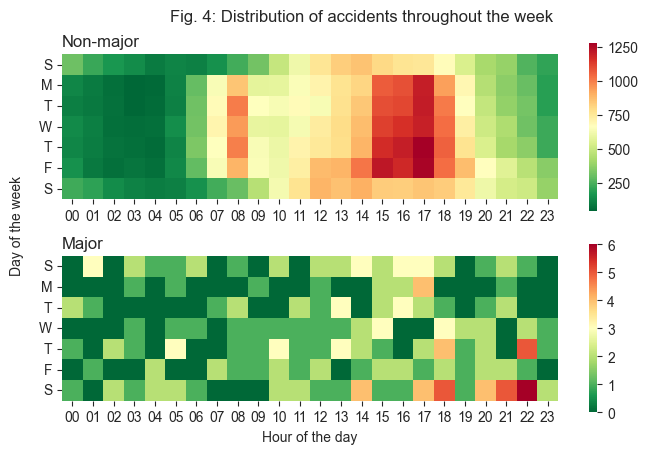

In [87]:
# create tables with number of accidents per hour for each day of the week
non_major_day_hour = pd.crosstab(index = non_major_accidents['day_of_week'], columns = non_major_accidents['time_hr'])
major_day_hour = pd.crosstab(index = major_accidents['day_of_week'], columns = major_accidents['time_hr'])

fig, ax = plt.subplots(2,1,  figsize=(8, 4.8))

g1 = sns.heatmap(non_major_day_hour, cmap='RdYlGn_r', square = True, yticklabels=['S','M','T','W','T','F','S'],xticklabels =hour_label, ax = ax[0])
g2 = sns.heatmap(major_day_hour, cmap='RdYlGn_r', square = True, yticklabels=['S','M','T','W','T','F','S'], ax = ax[1])
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_ylabel('')
ax[0].set_title('Non-major', loc='left')
ax[1].set_title('Major', loc='left')
fig.suptitle('Fig. 4: Distribution of accidents throughout the week', y=0.95)
plt.xlabel('Hour of the day')
ax[0].tick_params(labelrotation=0)
ax[1].tick_params(labelrotation=0)
fig.text(0.06, 0.5, 'Day of the week', va='center', rotation='vertical')
plt.show()

# What characteristics stand out in major incidents compared with other accidents?

We've already explored the relationship between number of accidents and time. It was clear that major and non-major accidents tend to occur on different days of the week and at different times of the day. In this section we will explore the other characteristics of major and non-major accidents. 

## Number of vehicles and casualties 

Both major and non-major accidents typically only involve two vehicles. The non-major accidents in the dataset typically result in one casualty, where the major accidents result in 3. 

In [88]:
# calculate typical number of vehicles and casulaties for each type of accident
veh_cas = accidents.groupby('major')[['number_of_vehicles', 'number_of_casualties']].median()

# create descriptive index
veh_cas['Type'] = pd.Series(['Non-major', 'Major']) 
veh_cas.set_index(['Type'], inplace = True) 

#rename columns and display
veh_cas.columns = ['Typical number of vehicles', 'Typical number of casualties']
display(veh_cas)

,Typical number of vehicles,Typical number of casualties
Type,,
Non-major,2.0,1.0
Major,2.0,3.0


## Geographical distribution

There are no specific roads that have a high number of major accidents. Over two thirds (68%) of non-major accidents occur in urban areas. In contrast, 76% of major accidents occur in rural areas. 

A distribution of accidents across the country are shown on a map in Fig. 5. The major accidents do not appear to be concentrated in any region, and the geospatial distribution of vehicle accidents follow the population density of the United Kingdom well. The one exception is Northern Ireland, where there were no accidents in the dataset. This indicates a gap in the data, and it should be noted that the data is not for the entire United Kingdom.

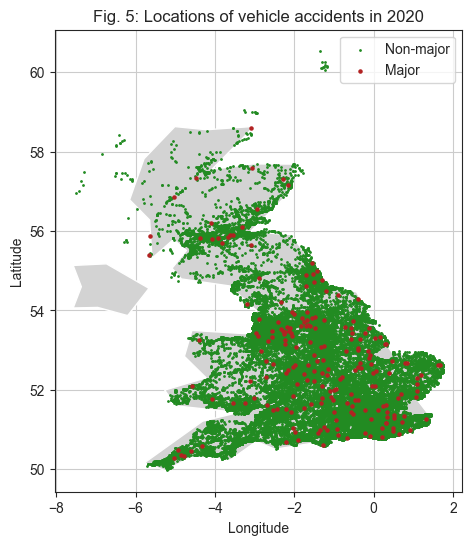

In [89]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

# extract gps coordinates for all accidents and create a geopandas df for plotting
gpscoords_non = non_major_accidents[['longitude', 'latitude']]
geometry_non = [Point(xy) for xy in zip(gpscoords_non['longitude'], gpscoords_non['latitude'])]
gdf_non = GeoDataFrame(gpscoords_non, geometry=geometry_non)   

# extract gps coordinates for major  accidents and create a geopandas df for plotting
gpscoords_major = major_accidents[['longitude', 'latitude']]
geometry_major = [Point(xy) for xy in zip(gpscoords_major['longitude'], gpscoords_major['latitude'])]
gdf_major = GeoDataFrame(gpscoords_major, geometry=geometry_major)   

# get simple map of the UK that is built into geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
uk = world[(world.name == "United Kingdom")]

# plot uk map
ax=uk.plot(figsize=(10, 6),color='lightgrey')

# overlay locations of all accidents
gdf_non.plot(ax=ax, marker='o', color='forestgreen', markersize=1, label="Non-major");

# overlay locations of major accidents
gdf_major.plot(ax=ax, marker='o', color='firebrick', markersize=5, label='Major');

plt.title('Fig. 5: Locations of vehicle accidents in 2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Physical conditions at the accident site
### Pearson chi-squared test
There are several features that relate to the conditions at the accident site, such as the road surface conditions, the weather and the speed limit. I will perform a Pearson chi-squared test on these features to see if they are likely important in determining whether an accident will be major or not. I will use this as a guide to explore certain features further.

The statistical test gives p-values that is an indication of the likelihood that classifying an accident as major is independent of the feature in question. Therefore, a smaller p-value is indicative of a more likely dependance. For easier interpretation, Fig. 6 shows the the negative of the logarithm of the p-value of each feature. This means a longer bar in the figure indicates a greater likelihood of the feature being an important factor in distinguishing between major and non-major accidents.  

The dashed vertical line indicates the position where there is a 95% certainty that a feature is important in determining whether an accident will be classed as major or not. It is most likely independent of road type, the second road class, surface conditions and weather conditions. I will investigate the rest of the features to see if any of them have different patterns for non-major and major accidents.

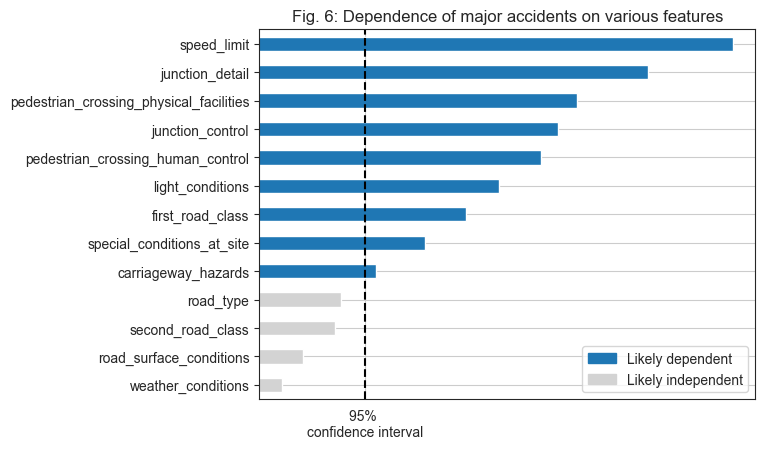

In [90]:
from sklearn.feature_selection import chi2
import matplotlib.patches as mpatches

# list of features to compare to major
cols = [ 'first_road_class',  'road_type',
       'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards']

X = accidents[cols]

# define target variable to compare to
y = accidents['major']

# perform chi-squared tests of independence
chi_scores = chi2(X,y)

# get and sort p-values of tests
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(ascending = False, inplace = True)

# use logs of p-values for better visualization 
p_values_exponents = -np.log10(p_values)

# list of features likely to be dependent on major, from most to least likely
dep_feat = list(p_values[p_values < 0.05].index)
dep_feat.reverse()

# choose different colours for features that are in/dependent of major
colors = ['C0' if i < 0.05 else 'lightgrey' for i in p_values]

fig, ax = plt.subplots()
p_values_exponents.plot.barh(color = colors, log=True)
plt.axvline(10**0.05, linestyle ='--',c = 'black')
plt.tick_params(axis='x', which='both', bottom=False )   
plt.xticks(ticks=[10**0.05], labels=['95% \nconfidence interval'])
plt.title('Fig. 6: Dependence of major accidents on various features')
red_patch = mpatches.Patch(color='C0', label='Likely dependent')
blue_patch = mpatches.Patch(color='lightgrey', label='Likely independent')
ax.legend(handles=[red_patch, blue_patch])
plt.show()

Fig. 7 shows that the relationships between accidents and physical conditions at the accident site are similar for major and non-major accidents for most of the inspected features. The clear exception is the speed limit. 


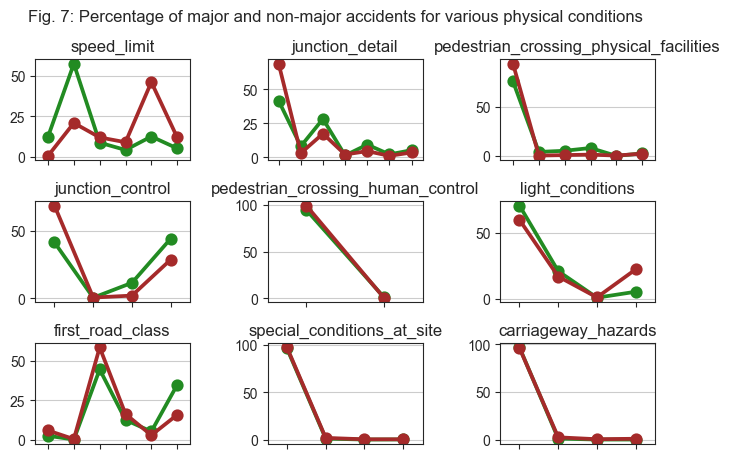

In [91]:
def plot_props(col,ax):
    """Creates pointplot on ax to compare proportions of major and non-major accidents for a            categorical feature col"""
    
    # get normalized frequency table for non-major accidents
    non_major_props =           pd.DataFrame(non_major_accidents[col].value_counts(normalize=True)).reset_index()
    non_major_props.columns = [col,'Non-major']
    
    #get normalized frequency table for major accidents   
    major_props = pd.DataFrame(major_accidents[col].value_counts(normalize=True)).reset_index()
    major_props.columns = [col,'Major']
    
    # merge the two tables for plotting in sns
    props = non_major_props.merge(major_props, on=col)
    
    # convert proportions to percentages
    props['Major'] = props['Major']*100
    props['Non-major'] = props['Non-major']*100
    
    # transform to long table format
    props = pd.melt(props, id_vars=col, value_vars=['Non-major', 'Major'])
    
    # create plot
    g = sns.pointplot(data=props, x=col, y='value', hue= 'variable', ax = ax, palette =['forestgreen', 'brown'])
    ax.set_title(col)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.xaxis.set_ticklabels([])
    ax.get_legend().remove()
    
    return g

fig, ax = plt.subplots(3,3,figsize=(8,5))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

# create plot for each likely dependant feature
for ax, col in zip(ax.flatten(), dep_feat):
    plot_props(col, ax)
    
fig.suptitle('Fig. 7: Percentage of major and non-major accidents for various physical conditions')
plt.show()

### Effect of speed limit

Fig. 8 shows the percentage of accidents (non-major and major, respectively) that occur at each speed limit. Most (57%) of non-major accidents occurs on roads with a speed limit of 30 mph, whereas almost half (46%) of major accidents occurs on roads with a speed limit of 60 mph. This is consistent with the finding that most non-major accidents happen in urban areas (that generally have lower speed limits) and major accidents tend to occur in rural areas. All types of accidents are unlikely to occur at 40, 50 and 70 mph. However, it is probable that these are not necessarily safer speeds to drive at, but only that these are less typical speed limits for roads in the United Kingdom.

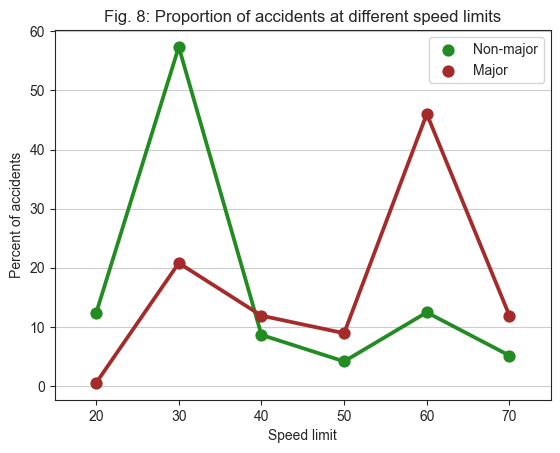

In [92]:
fig, ax = plt.subplots()
plot_props('speed_limit',ax)
ax.xaxis.set_ticklabels([i*10 for i in range(8) if i > 1])
ax.set_xlabel('Speed limit')
ax.set_ylabel('Percent of accidents')
ax.set_title('Fig. 8: Proportion of accidents at different speed limits')
plt.legend()
plt.show()